In [4]:
Compozit = pd.read_excel('C:/Users/Владимир/OneDrive/Desktop/работа/Обучение/ВКР/Датасет для ВКР_композиты/Compozit_int.xlsx') 

In [6]:
Compozit.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       37 non-null     float64
 1   Плотность, кг/м3                      37 non-null     float64
 2   модуль упругости, ГПа                 37 non-null     float64
 3   Количество отвердителя, м.%           37 non-null     float64
 4   Содержание эпоксидных групп,%_2       37 non-null     float64
 5   Температура вспышки, С_2              37 non-null     float64
 6   Поверхностная плотность, г/м2         37 non-null     float64
 7   Модуль упругости при растяжении, ГПа  37 non-null     float64
 8   Прочность при растяжении, МПа         37 non-null     float64
 9   Потребление смолы, г/м2               37 non-null     float64
 10  Угол нашивки, град                    37 non-null     int64  
 11  Шаг нашивки          

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import History
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [10]:
X = Compozit.drop(['Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
y = Compozit['Соотношение матрица-наполнитель']

# разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [14]:
normalizer.adapt(np.array(X))

In [16]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [69]:
def baseline_model():
    model = Sequential()
    normalizer
    model.add(Dense(20, input_dim=10, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))
    model.add(Dense(150, input_dim=20, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))  
    model.add(Dense(150, input_dim=150, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))  
    model.add(Dense(100, input_dim=150, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))  
    model.add(Dense(20, input_dim=100, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))   
    model.add(Dense(1, input_dim=20, activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))
    
   
    adam = Adam()
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = baseline_model()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 20.2200 - val_loss: 6.7757
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 9.5275 - val_loss: 3.6173
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 5.7676 - val_loss: 2.3153
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 4.1678 - val_loss: 1.5733
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.2022 - val_loss: 1.0718
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2.4892 - val_loss: 0.7420
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.9601 - val_loss: 0.5575
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.5959 - val_loss: 0.4754
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.3598 - val_loss: 0.4515
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.2112 - val_loss: 0.4578
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.1184 - val_loss: 0.4790
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.0601 - val_loss: 0.5066


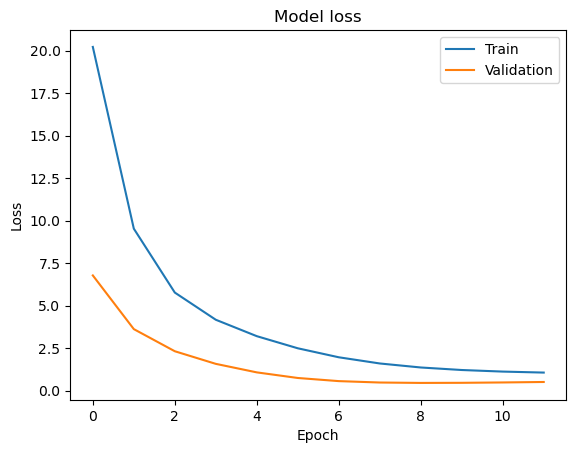

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5321


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 150)                 │           3,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 20)                  │           2,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,485 (505.80 KB)

 Trainable params: 43,161 (168.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 86,324 (337.21 KB)

Test loss: 0.532
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
MSE:, 0.532
MAE:, 0.570
R2:, -0.481


In [71]:
history = model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=1, validation_split=0.3, callbacks = [early_stopping_callback])

# визуализация обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#оценка модели на тестовых данных
scores = model.evaluate(X_test, y_test)

model.summary()

print(f'Test loss: {scores:.3f}')

# прогнозирование значения целевых переменных 
y_pred = model.predict(X_test)

print(f'MSE:, {mean_squared_error(y_test, y_pred):.3f}')
print(f'MAE:, {mean_absolute_error(y_test, y_pred):.3f}')
print(f'R2:, {r2_score(y_test, y_pred):.3f}')